In [1]:
import os
from pathlib import Path
os.chdir(r"C:\Users\Mohad\Documents\Programming\NeuroPHorm")
from neurophorm.persistence import load_tda_results, compute_betti_stat_features
from neurophorm.visualization import *

In [2]:
output_directory = Path("examples/plots")     # where figures will be saved
OUTDIR = Path("examples/persistences")   # where data is loaded from
SAVE_FMT = "png"
LABEL_STYLES = {
    "A": ("#1f77b4", "-"),
    "B": ("#ff7f0e", "--"),
}
HOMOLOGY_DIMS = [0, 1, 2]   # adjust to [0,1,2] if you computed H2 as well


In [3]:
data = load_tda_results(
        output_directory=OUTDIR,
        load_all=False,
        load_betti=True,
        load_entropy=True,
        load_amplitude=True,
        include_all_betti_x=True,
        interpolate_betti_to_shared_x=True,
    )

[INFO] 2025-09-04 16:23:24,505 - neurophorm.persistence - load_tda_results: start | out_dir=examples\persistences | dataset_names=None | load_all=False
[INFO] 2025-09-04 16:23:24,792 - neurophorm.persistence - load_tda_results: done | datasets_loaded=2


In [4]:
data["A"].keys()

dict_keys(['betti_curves_original', 'betti_x_list', 'betti_curves_shared', 'betti_x_shared', 'persistence_entropy', 'wasserstein_amplitude', 'bottleneck_amplitude'])

[INFO] 2025-09-04 16:23:24,825 - neurophorm.visualization - plot_betti_curves: start | groups=None | dims=[0, 1, 2] | save=False(pdf) | show=True


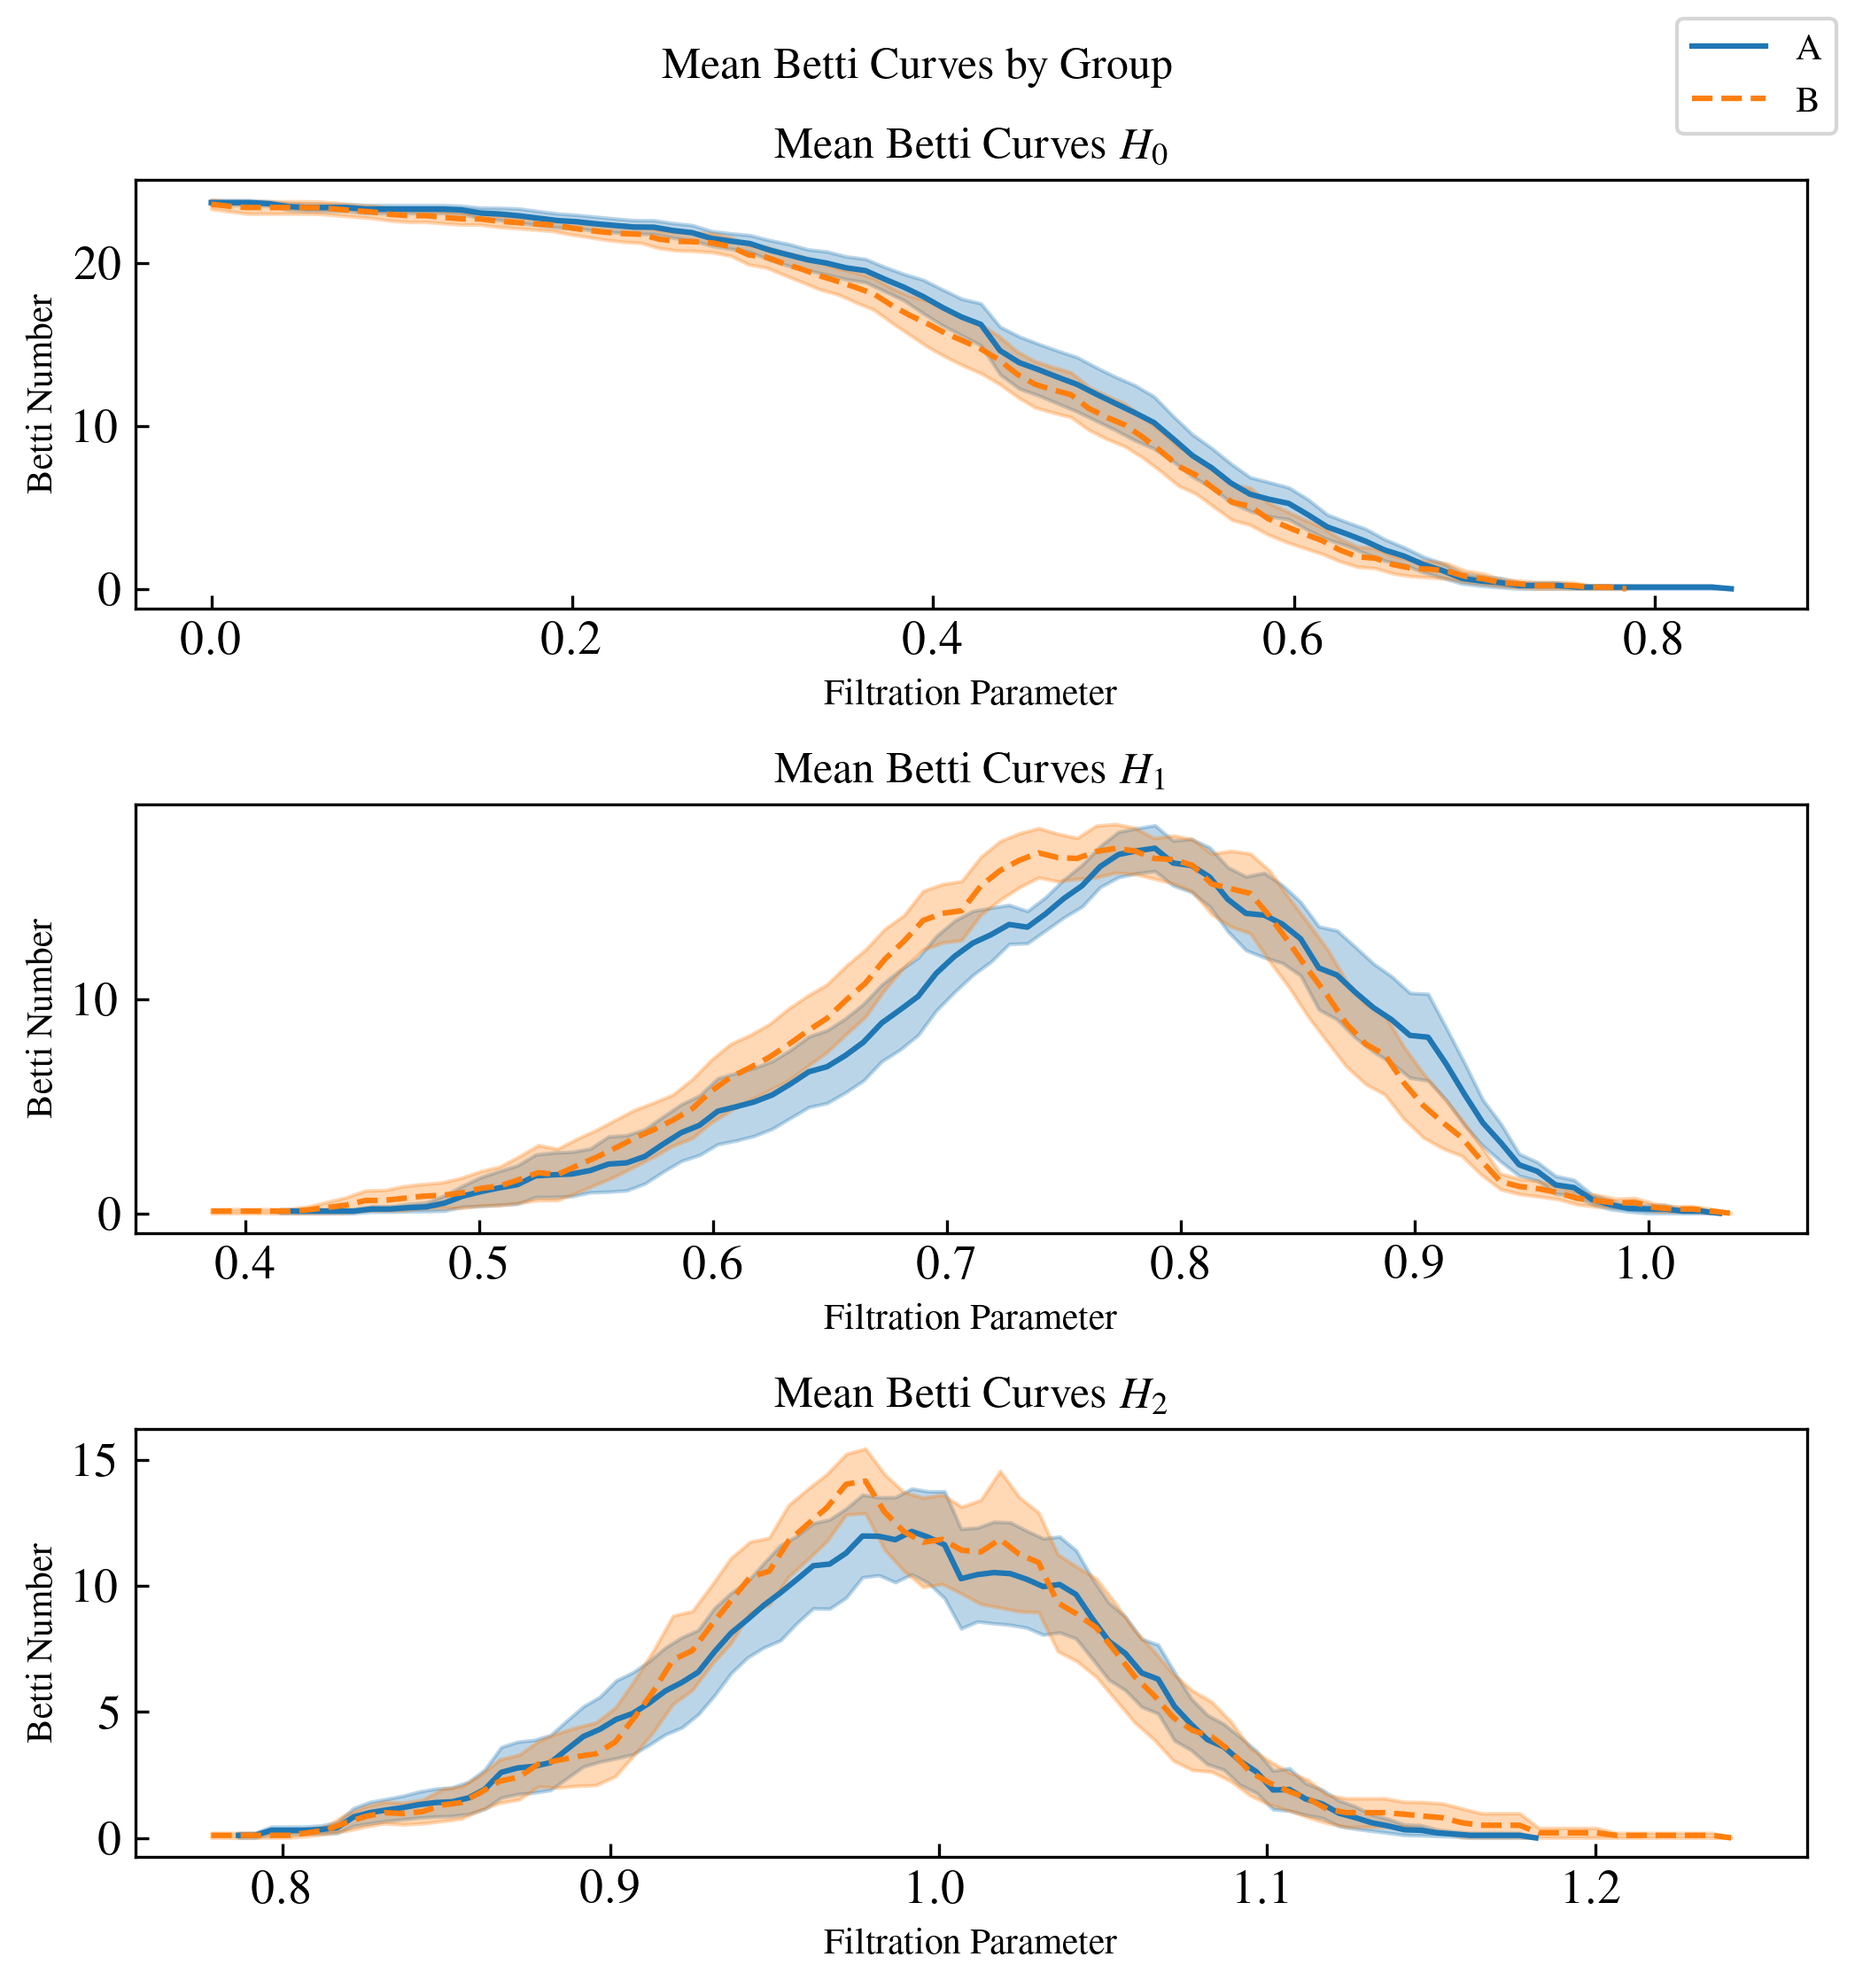

[INFO] 2025-09-04 16:23:26,189 - neurophorm.visualization - plot_betti_curves: done


In [5]:
plot_betti_curves(
        data,
        dimensions=HOMOLOGY_DIMS,
        label_styles=LABEL_STYLES,
        output_directory=output_directory,
    )

[INFO] 2025-09-04 16:23:26,230 - neurophorm.visualization - plot_p_values: start | feature=persistence_entropy | test=auto | save=False | groups=None


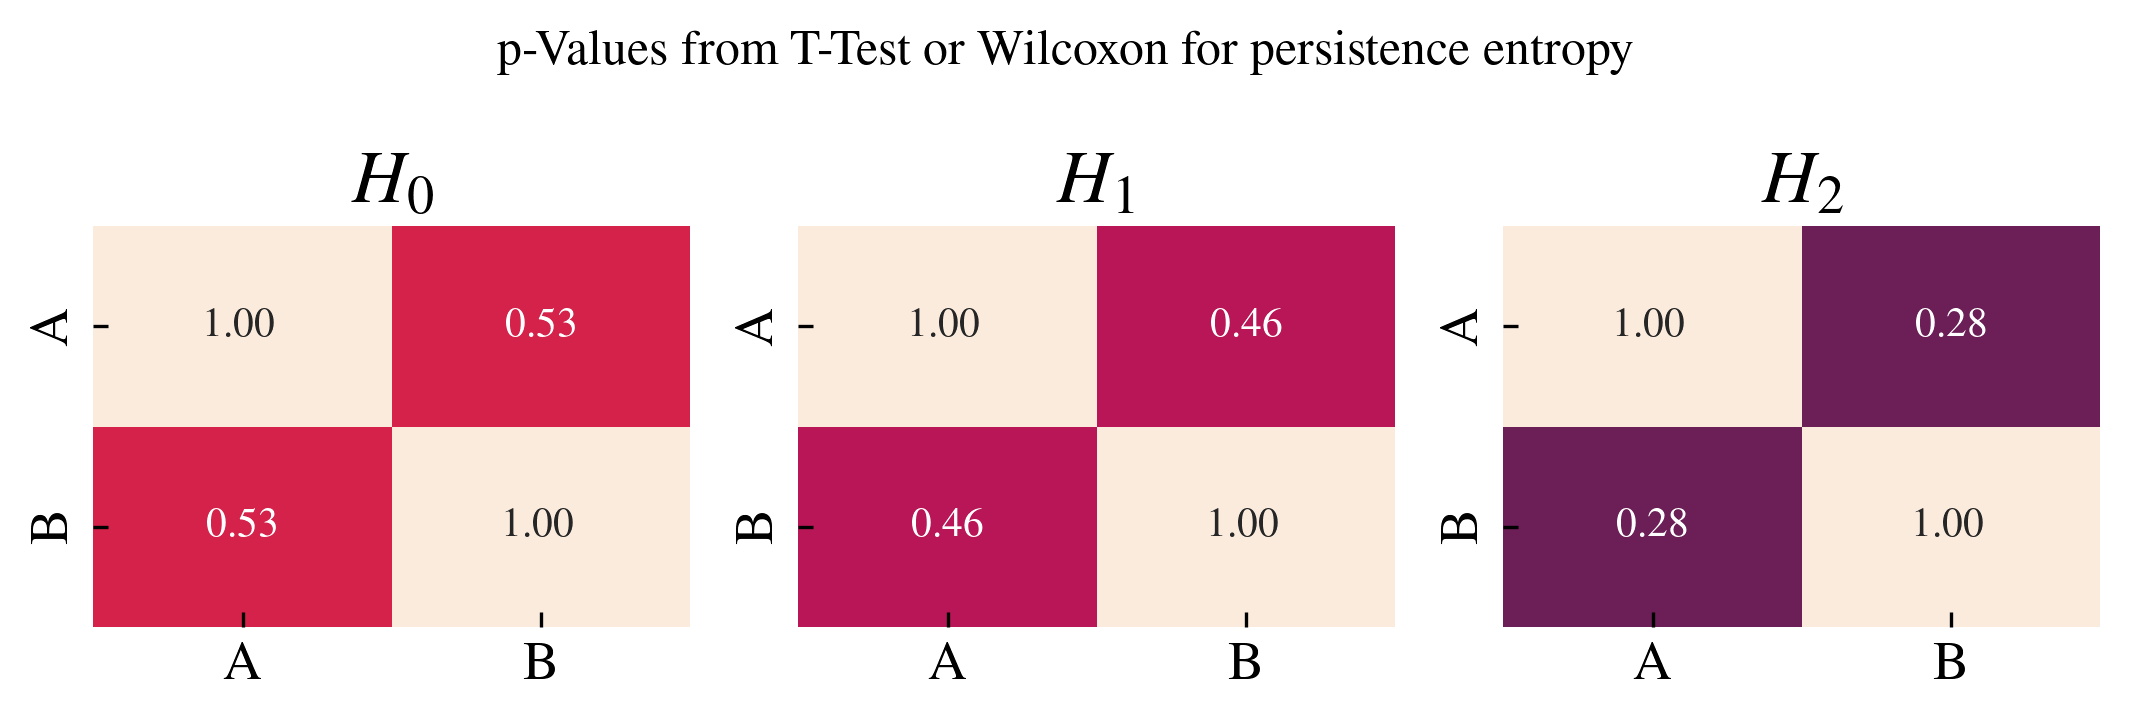

[INFO] 2025-09-04 16:23:27,102 - neurophorm.visualization - plot_p_values: done


In [6]:
p = plot_p_values(
        data,
        feature_name="persistence_entropy",
        dimensions=HOMOLOGY_DIMS,
        output_directory=output_directory,
    )

[INFO] 2025-09-04 16:23:27,127 - neurophorm.visualization - plot_swarm_violin: start | feature=wasserstein_amplitude | groups=None | dims=[0] | save=False


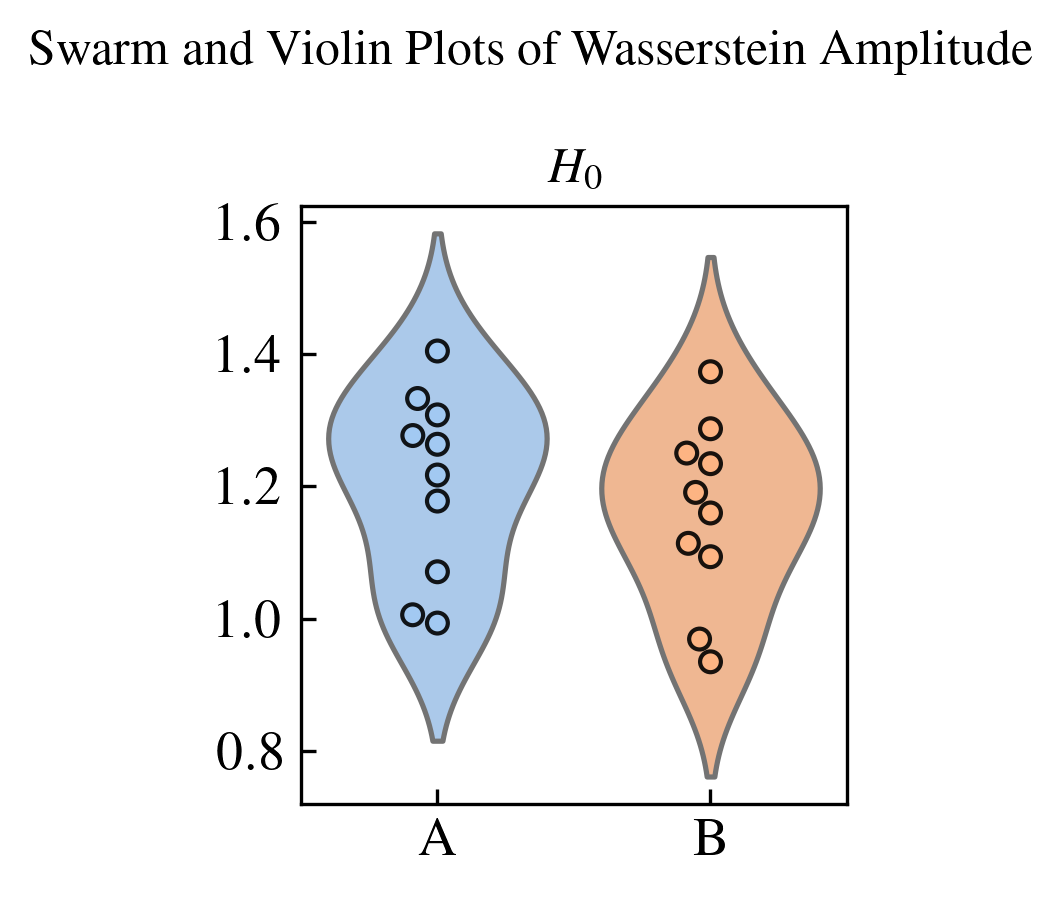

[INFO] 2025-09-04 16:23:27,433 - neurophorm.visualization - plot_swarm_violin: done


In [7]:
plot_swarm_violin(
        data,
        feature_name="wasserstein_amplitude",
        dimensions=[0])

[INFO] 2025-09-04 16:23:27,451 - neurophorm.visualization - plot_kde_dist: start | feature=bottleneck_amplitude | groups=None | save=False


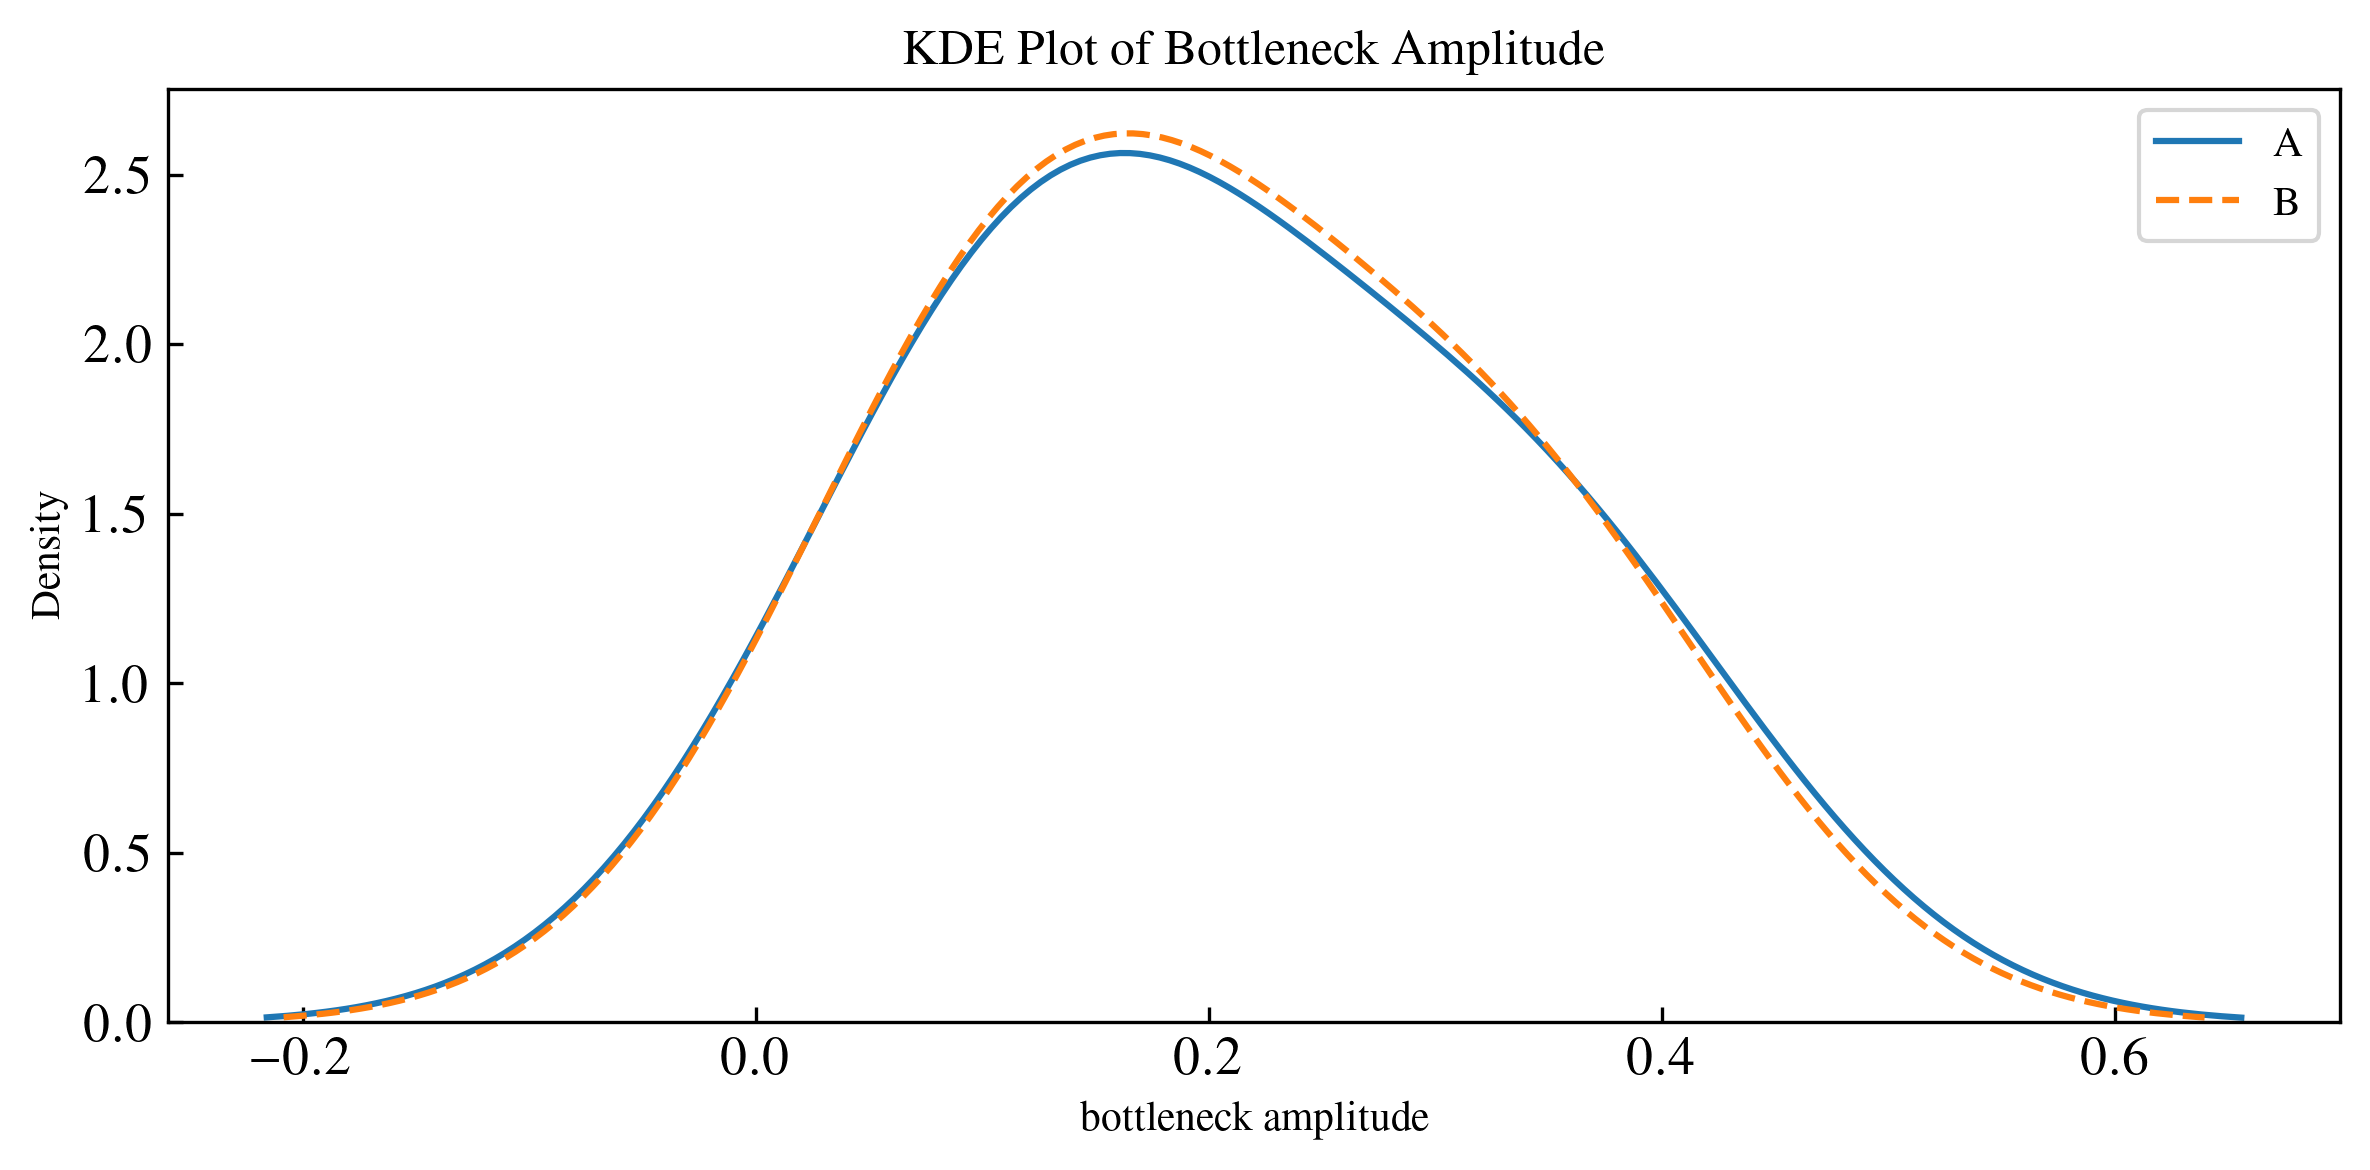

[INFO] 2025-09-04 16:23:27,857 - neurophorm.visualization - plot_kde_dist: done


In [8]:
plot_kde_dist(
        data,
        feature_name="bottleneck_amplitude",
)

In [9]:
betti = compute_betti_stat_features(data)

[INFO] 2025-09-04 16:23:27,888 - neurophorm.persistence - compute_betti_stat_features: done | datasets=2


[INFO] 2025-09-04 16:23:27,912 - neurophorm.visualization - plot_betti_stats_pvalues: start | feature=auc_trapz | test=auto | save=False | groups=None


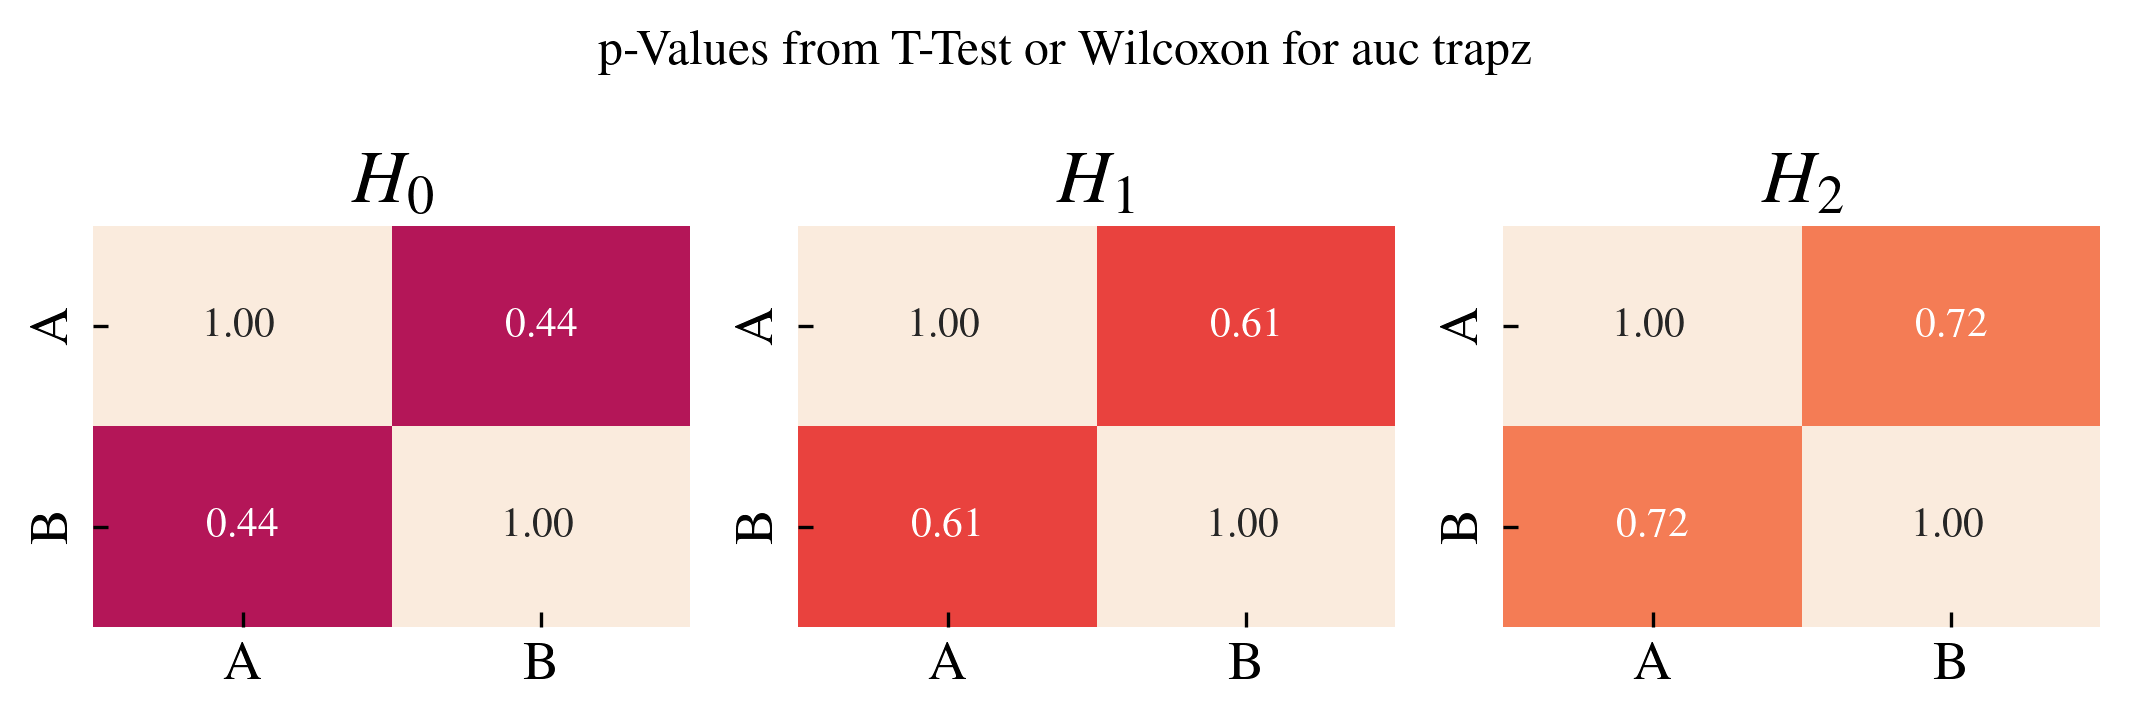

[INFO] 2025-09-04 16:23:28,734 - neurophorm.visualization - plot_p_values: done (betti-stats mode)


In [10]:
p_mats = plot_betti_stats_pvalues(
    betti,
    feature_name="auc_trapz")